In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pprint import pprint

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
DATA_DAY_MINUS_1 = "../data/round-2-island-data-bottle/prices_round_2_day_-1.csv"
DATA_DAY_0 = "../data/round-2-island-data-bottle/prices_round_2_day_0.csv"
DATA_DAY_1 = "../data/round-2-island-data-bottle/prices_round_2_day_1.csv"

df0 = pd.read_csv(DATA_DAY_MINUS_1, sep=';')
df1 = pd.read_csv(DATA_DAY_0, sep=';')
df2 =  pd.read_csv(DATA_DAY_1, sep=';')

df = pd.concat([df0, df1, df2])
df.set_index(['day', 'timestamp', 'product'], inplace=True)
df 

bid_price_1  bid_volume_1  bid_price_2  \
day timestamp product                                                    
-1  0         CROISSANTS               4304           112          NaN   
              JAMS                     6670            66       6669.0   
              SQUID_INK                2005             1       2002.0   
              PICNIC_BASKET1          59284            20      59283.0   
              PICNIC_BASKET2          30606            20      30605.0   
...                                     ...           ...          ...   
 1  999900    JAMS                     6519           204          NaN   
              RAINFOREST_RESIN         9995            20          NaN   
              SQUID_INK                1799            20          NaN   
              PICNIC_BASKET1          58713            15      58712.0   
              PICNIC_BASKET2          30100            36          NaN   

                                bid_volume_2  bid_price_3  bid_volume_3  \
day timestamp product                                                     
-1  0         CROISSANTS                 NaN          NaN           NaN   
              JAMS                     137.0          NaN           NaN   
              SQUID_INK                 31.0          NaN           NaN   
              PICNIC_BASKET1            18.0          NaN           NaN   
              PICNIC_BASKET2            18.0          NaN           NaN   
...                                      ...          ...           ...   
 1  999900    JAMS                       NaN          NaN           NaN   
              RAINFOREST_RESIN           NaN          NaN           NaN   
              SQUID_INK                  NaN          NaN           NaN   
              PICNIC_BASKET1            21.0          NaN           NaN   
              PICNIC_BASKET2             NaN          NaN           NaN   

                                ask_price_1  ask_volume_1  ask_price_2  \
day timestamp product                                                    
-1  0         CROISSANTS               4305           112          NaN   
              JAMS                     6671            66       6672.0   
              SQUID_INK                2006            31          NaN   
              PICNIC_BASKET1          59294             2      59295.0   
              PICNIC_BASKET2          30612            20      30613.0   
...                                     ...           ...          ...   
 1  999900    JAMS                     6521           204          NaN   
              RAINFOREST_RESIN        10005            20          NaN   
              SQUID_INK                1802            20          NaN   
              PICNIC_BASKET1          58724            15      58725.0   
              PICNIC_BASKET2          30107            36          NaN   

                                ask_volume_2  ask_price_3  ask_volume_3  \
day timestamp product                                                     
-1  0         CROISSANTS                 NaN          NaN           NaN   
              JAMS                     137.0          NaN           NaN   
              SQUID_INK                  NaN          NaN           NaN   
              PICNIC_BASKET1            36.0          NaN           NaN   
              PICNIC_BASKET2            18.0          NaN           NaN   
...                                      ...          ...           ...   
 1  999900    JAMS                       NaN          NaN           NaN   
              RAINFOREST_RESIN           NaN          NaN           NaN   
              SQUID_INK                  NaN          NaN           NaN   
              PICNIC_BASKET1            21.0          NaN           NaN   
              PICNIC_BASKET2             NaN          NaN           NaN   

                                mid_price  profit_and_loss  
day timestamp product                                       
-1  0         CROISSANTS        

In [3]:
pprint(df.index.get_level_values(2).unique().values.tolist())

['CROISSANTS',
 'JAMS',
 'SQUID_INK',
 'PICNIC_BASKET1',
 'PICNIC_BASKET2',
 'RAINFOREST_RESIN',
 'DJEMBES',
 'KELP']


In [4]:
(df["ask_price_1"] - df["bid_price_1"]).groupby("product").describe()

,count,mean,std,min,25%,50%,75%,max
product,,,,,,,,
CROISSANTS,30000.0,1.207733,0.405692,1.0,1.0,1.0,1.0,2.0
DJEMBES,30000.0,1.264667,0.441163,1.0,1.0,1.0,2.0,2.0
JAMS,30000.0,1.628333,0.483258,1.0,1.0,2.0,2.0,2.0
KELP,30000.0,2.716300,0.882179,1.0,2.0,3.0,3.0,4.0
PICNIC_BASKET1,30000.0,9.245200,2.004431,1.0,9.0,9.0,11.0,12.0
PICNIC_BASKET2,30000.0,5.225933,1.141285,1.0,5.0,5.0,6.0,7.0
RAINFOREST_RESIN,30000.0,6.771800,2.472393,2.0,6.0,8.0,8.0,10.0
SQUID_INK,30000.0,2.604367,0.838092,1.0,2.0,3.0,3.0,4.0


In [5]:
PRODUCTS = set(["RAINFOREST_RESIN"])
# PRODUCTS = set([""])

ink = df[df.index.isin(PRODUCTS, level=2)]
# (ink["ask_price_1"] - ink["bid_price_1"]).groupby("product").describe()
ink

bid_price_1  bid_volume_1  bid_price_2  \
day timestamp product                                                    
-1  0         RAINFOREST_RESIN        10002             1       9996.0   
    100       RAINFOREST_RESIN         9996             2       9995.0   
    200       RAINFOREST_RESIN         9995            20          NaN   
    300       RAINFOREST_RESIN         9996             2       9995.0   
    400       RAINFOREST_RESIN         9996             2       9995.0   
...                                     ...           ...          ...   
 1  999500    RAINFOREST_RESIN         9998             2       9996.0   
    999600    RAINFOREST_RESIN         9995            24          NaN   
    999700    RAINFOREST_RESIN         9996             1       9995.0   
    999800    RAINFOREST_RESIN         9996             2       9995.0   
    999900    RAINFOREST_RESIN         9995            20          NaN   

                                bid_volume_2  bid_price_3  bid_volume_3  \
day timestamp product                                                     
-1  0         RAINFOREST_RESIN           2.0       9995.0          29.0   
    100       RAINFOREST_RESIN          22.0          NaN           NaN   
    200       RAINFOREST_RESIN           NaN          NaN           NaN   
    300       RAINFOREST_RESIN          29.0          NaN           NaN   
    400       RAINFOREST_RESIN          25.0          NaN           NaN   
...                                      ...          ...           ...   
 1  999500    RAINFOREST_RESIN           1.0       9995.0          24.0   
    999600    RAINFOREST_RESIN           NaN          NaN           NaN   
    999700    RAINFOREST_RESIN          29.0          NaN           NaN   
    999800    RAINFOREST_RESIN          22.0          NaN           NaN   
    999900    RAINFOREST_RESIN           NaN          NaN           NaN   

                                ask_price_1  ask_volume_1  ask_price_2  \
day timestamp product                                                    
-1  0         RAINFOREST_RESIN        10004             2      10005.0   
    100       RAINFOREST_RESIN        10004             2      10005.0   
    200       RAINFOREST_RESIN        10005            20          NaN   
    300       RAINFOREST_RESIN        10004             2      10005.0   
    400       RAINFOREST_RESIN        10004             2      10005.0   
...                                     ...           ...          ...   
 1  999500    RAINFOREST_RESIN        10004             1      10005.0   
    999600    RAINFOREST_RESIN        10005            24          NaN   
    999700    RAINFOREST_RESIN        10002             7      10004.0   
    999800    RAINFOREST_RESIN        10004             2      10005.0   
    999900    RAINFOREST_RESIN        10005            20          NaN   

                                ask_volume_2  ask_price_3  ask_volume_3  \
day timestamp product                                                     
-1  0         RAINFOREST_RESIN          29.0          NaN           NaN   
    100       RAINFOREST_RESIN          22.0          NaN           NaN   
    200       RAINFOREST_RESIN           NaN          NaN           NaN   
    300       RAINFOREST_RESIN          29.0          NaN           NaN   
    400       RAINFOREST_RESIN          25.0          NaN           NaN   
...                                      ...          ...           ...   
 1  999500    RAINFOREST_RESIN          24.0          NaN           NaN   
    999600    RAINFOREST_RESIN           NaN          NaN           NaN   
    999700    RAINFOREST_RESIN           1.0      10005.0          29.0   
    999800    RAINFOREST_RESIN          22.0          NaN           NaN   
    999900    RAINFOREST_RESIN           NaN          NaN           NaN   

                                mid_price  profit_and_loss  
day timestamp product                                       
-1  0         RAINFOREST_RESIN  

In [6]:
ink.describe()

,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
count,30000.000000,30000.000000,22319.000000,22319.000000,5131.000000,5131.000000,30000.000000,30000.000000,22357.000000,22357.000000,5174.000000,5174.000000,30000.000000,30000.0
mean,9996.605633,8.214567,9995.290649,19.712173,9995.086338,23.079322,10003.377433,8.186367,10004.705059,19.677953,10004.915539,23.074797,9999.991533,0.0
std,1.931260,10.169512,0.638883,10.127144,0.310553,7.042211,1.949796,10.145452,0.647785,10.135103,0.288343,7.139466,1.495845,0.0
min,9995.000000,0.000000,9995.000000,1.000000,9995.000000,1.000000,9998.000000,1.000000,10000.000000,1.000000,10002.000000,1.000000,9996.500000,0.0
25%,9995.000000,1.000000,9995.000000,20.000000,9995.000000,22.000000,10004.000000,1.000000,10005.000000,20.000000,10005.000000,22.000000,10000.000000,0.0
50%,9996.000000,2.000000,9995.000000,23.000000,9995.000000,24.000000,10004.000000,2.000000,10005.000000,23.000000,10005.000000,25.000000,10000.000000,0.0
75%,9996.000000,20.000000,9995.000000,27.000000,9995.000000,27.000000,10005.000000,20.000000,10005.000000,27.000000,10005.000000,28.000000,10000.000000,0.0
max,10002.000000,30.000000,10000.000000,30.000000,9998.000000,30.000000,10005.000000,30.000000,10005.000000,30.000000,10005.000000,30.000000,10003.500000,0.0


<AxesSubplot:xlabel='timestamp', ylabel='mid_price'>

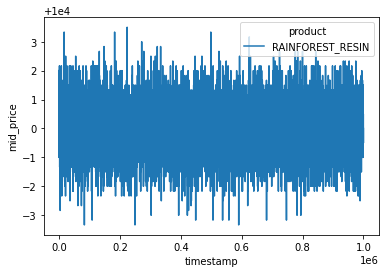

In [7]:
plt.rcParams["figure.figsize"] = (20,8)
sns.lineplot(ink,
             x="timestamp",
             y="mid_price",
             hue="product",
             errorbar=None,
             )

In [8]:
PRODUCTS = set(["KELP"])

ink = df[df.index.isin(PRODUCTS, level=2)]
ink

bid_price_1  bid_volume_1  bid_price_2  bid_volume_2  \
day timestamp product                                                         
-1  0         KELP            2028             1       2026.0           2.0   
    100       KELP            2025            24          NaN           NaN   
    200       KELP            2025            22          NaN           NaN   
    300       KELP            2025            31          NaN           NaN   
    400       KELP            2025            27          NaN           NaN   
...                            ...           ...          ...           ...   
 1  999500    KELP            2046             1       2044.0          25.0   
    999600    KELP            2046             2       2044.0          24.0   
    999700    KELP            2044            29          NaN           NaN   
    999800    KELP            2044            24          NaN           NaN   
    999900    KELP            2043            20          NaN           NaN   

                       bid_price_3  bid_volume_3  ask_price_1  ask_volume_1  \
day timestamp product                                                         
-1  0         KELP          2025.0          29.0         2029            31   
    100       KELP             NaN           NaN         2028             2   
    200       KELP             NaN           NaN         2028            20   
    300       KELP             NaN           NaN         2028             2   
    400       KELP             NaN           NaN         2028            27   
...                            ...           ...          ...           ...   
 1  999500    KELP             NaN           NaN         2047            25   
    999600    KELP             NaN           NaN         2047            24   
    999700    KELP             NaN           NaN         2047            30   
    999800    KELP             NaN           NaN         2046             8   
    999900    KELP             NaN           NaN         2047            20   

                       ask_price_2  ask_volume_2  ask_price_3  ask_volume_3  \
day timestamp product                                                         
-1  0         KELP             NaN           NaN          NaN           NaN   
    100       KELP          2029.0          22.0          NaN           NaN   
    200       KELP             NaN           NaN          NaN           NaN   
    300       KELP          2029.0          29.0          NaN           NaN   
    400       KELP             NaN           NaN          NaN           NaN   
...                            ...           ...          ...           ...   
 1  999500    KELP             NaN           NaN          NaN           NaN   
    999600    KELP             NaN           NaN          NaN           NaN   
    999700    KELP             NaN           NaN          NaN           NaN   
    999800    KELP          2047.0          24.0          NaN           NaN   
    999900    KELP             NaN           NaN          NaN           NaN   

                       mid_price  profit_and_loss  
day timestamp product                              
-1  0         KELP        2028.5              0.0  
    100       KELP        2026.5              0.0  
    200       KELP        2026.5              0.0  
    300       KELP        2026.5              0.0  
    400       KELP        2026.5              0.0  
...                          ...              ...  
 1  999500    KELP        2046.5              0.0  
    999600    KELP        2046.5              0.0  
    999700    KELP        2045.5              0.0  
    999800    KELP        2045.0              0.0  
    999900    KELP        2045.0              0.0  

[30000 rows x 14 columns]

/tmp/ipykernel_13295/468930456.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ink["mid_ma"] = ink["mid_price"].rolling(100).mean()
/tmp/ipykernel_13295/468930456.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ink["mid_std"] = ink["mid_price"].rolling(100).std()


<AxesSubplot:xlabel='timestamp', ylabel='mid_std'>

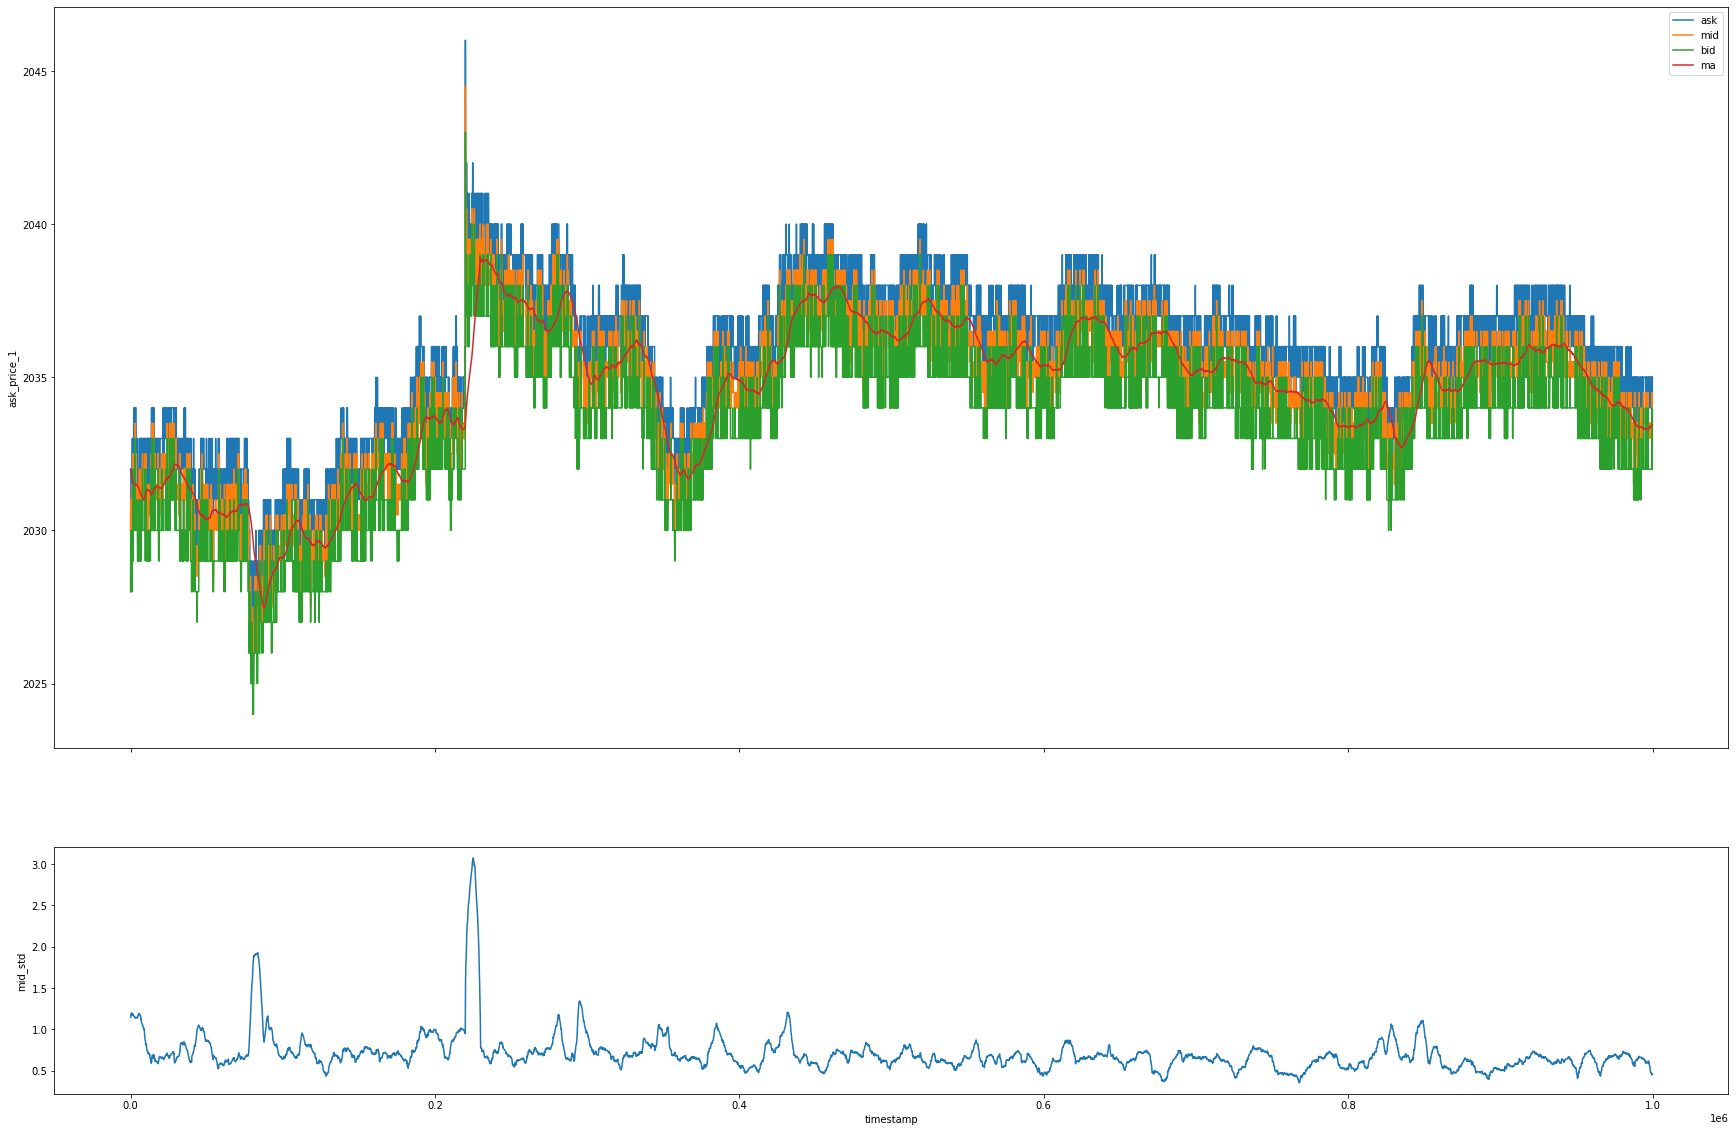

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (30,20)

# Compute rolling moving average and rolling standard deviation (both with window=15)
ink["mid_ma"] = ink["mid_price"].rolling(100).mean()
ink["mid_std"] = ink["mid_price"].rolling(100).std()

ink = ink[ink.index.isin([0], level=0)]

# Use your provided code to extract timestamps when mid_std is above its median.
signals = ink[ink["mid_std"] > ink["mid_std"].median()]
signals

# Create two vertically stacked subplots with a shared x-axis.
# Top plot (ax1) is for mid_price and mid_ma, bottom (ax2) for mid_std.
fig, (ax1, ax2) = plt.subplots(2, 1, 
                                gridspec_kw={'height_ratios': [3, 1]}, 
                                sharex=True, 
                                figsize=(30,20))

# Top graph: Plot mid_price and mid_ma.
sns.lineplot(data=ink, x="timestamp", y="ask_price_1", errorbar=None, ax=ax1, label="ask")
sns.lineplot(data=ink, x="timestamp", y="mid_price", errorbar=None, ax=ax1, label="mid")
sns.lineplot(data=ink, x="timestamp", y="bid_price_1", errorbar=None, ax=ax1, label="bid")
sns.lineplot(data=ink, x="timestamp", y="mid_ma", errorbar=None, ax=ax1, label="ma")
sns.lineplot(data=ink, x="timestamp", y="mid_std", errorbar=None, ax=ax2)
# sns.scatterplot(data=signals, x="timestamp", y="mid_price", ax=ax1, marker='^', color="green")

In [10]:
PRODUCTS = set(["SQUID_INK"])

ink = df[df.index.isin(PRODUCTS, level=2)]
ink

bid_price_1  bid_volume_1  bid_price_2  bid_volume_2  \
day timestamp product                                                           
-1  0         SQUID_INK         2005             1       2002.0          31.0   
    100       SQUID_INK         2004            24          NaN           NaN   
    200       SQUID_INK         2003            22          NaN           NaN   
    300       SQUID_INK         2003            31          NaN           NaN   
    400       SQUID_INK         2004            27          NaN           NaN   
...                              ...           ...          ...           ...   
 1  999500    SQUID_INK         1802             1       1800.0          25.0   
    999600    SQUID_INK         1801             2       1800.0          24.0   
    999700    SQUID_INK         1800            29          NaN           NaN   
    999800    SQUID_INK         1800            24          NaN           NaN   
    999900    SQUID_INK         1799            20          NaN           NaN   

                         bid_price_3  bid_volume_3  ask_price_1  ask_volume_1  \
day timestamp product                                                           
-1  0         SQUID_INK          NaN           NaN         2006            31   
    100       SQUID_INK          NaN           NaN         2007            24   
    200       SQUID_INK          NaN           NaN         2006            20   
    300       SQUID_INK          NaN           NaN         2006            31   
    400       SQUID_INK          NaN           NaN         2007            27   
...                              ...           ...          ...           ...   
 1  999500    SQUID_INK          NaN           NaN         1803            25   
    999600    SQUID_INK          NaN           NaN         1803            24   
    999700    SQUID_INK          NaN           NaN         1803            30   
    999800    SQUID_INK          NaN           NaN         1802             8   
    999900    SQUID_INK          NaN           NaN         1802            20   

                         ask_price_2  ask_volume_2  ask_price_3  ask_volume_3  \
day timestamp product                                                           
-1  0         SQUID_INK          NaN           NaN          NaN           NaN   
    100       SQUID_INK          NaN           NaN          NaN           NaN   
    200       SQUID_INK          NaN           NaN          NaN           NaN   
    300       SQUID_INK          NaN           NaN          NaN           NaN   
    400       SQUID_INK          NaN           NaN          NaN           NaN   
...                              ...           ...          ...           ...   
 1  999500    SQUID_INK          NaN           NaN          NaN           NaN   
    999600    SQUID_INK          NaN           NaN          NaN           NaN   
    999700    SQUID_INK          NaN           NaN          NaN           NaN   
    999800    SQUID_INK       1803.0          24.0          NaN           NaN   
    999900    SQUID_INK          NaN           NaN          NaN           NaN   

                         mid_price  profit_and_loss  
day timestamp product                                
-1  0         SQUID_INK     2005.5              0.0  
    100       SQUID_INK     2005.5              0.0  
    200       SQUID_INK     2004.5              0.0  
    300       SQUID_INK     2004.5              0.0  
    400       SQUID_INK     2005.5              0.0  
...                            ...              ...  
 1  999500    SQUID_INK     1802.5              0.0  
    999600    SQUID_INK     1802.0              0.0  
    999700    SQUID_INK     1801.5              0.0  
    999800    SQUID_INK     1801.0              0.0  
    999900    SQUID_INK     1800.5              0.0  

[30000 rows x 14 columns]

In [11]:
%matplotlib qt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (30,20)

# Compute rolling moving average and rolling standard deviation (both with window=15)
ink["mid_ma"] = ink["mid_price"].rolling(15).mean()
ink["mid_std"] = ink["mid_price"].rolling(15).std()

ink = ink[ink.index.isin([0], level=0)]

# Use your provided code to extract timestamps when mid_std is above its median.
signals = ink[ink["mid_std"] > ink["mid_std"].median()]
signals

# Create two vertically stacked subplots with a shared x-axis.
# Top plot (ax1) is for mid_price and mid_ma, bottom (ax2) for mid_std.
fig, (ax1, ax2) = plt.subplots(2, 1, 
                                gridspec_kw={'height_ratios': [3, 1]}, 
                                sharex=True, 
                                figsize=(30,20))

# Top graph: Plot mid_price and mid_ma.
sns.lineplot(data=ink, x="timestamp", y="ask_price_1", errorbar=None, ax=ax1, label="ask")
sns.lineplot(data=ink, x="timestamp", y="mid_price", errorbar=None, ax=ax1, label="mid")
sns.lineplot(data=ink, x="timestamp", y="bid_price_1", errorbar=None, ax=ax1, label="bid")
sns.lineplot(data=ink, x="timestamp", y="mid_ma", errorbar=None, ax=ax1, label="ma")
sns.lineplot(data=ink, x="timestamp", y="mid_std", errorbar=None, ax=ax2)
sns.scatterplot(data=signals, x="timestamp", y="mid_price", ax=ax1, marker='^', color="green")

/tmp/ipykernel_13295/3209095800.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ink["mid_ma"] = ink["mid_price"].rolling(15).mean()
/tmp/ipykernel_13295/3209095800.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ink["mid_std"] = ink["mid_price"].rolling(15).std()


<AxesSubplot:xlabel='timestamp', ylabel='ask_price_1'>

<AxesSubplot:ylabel='Count'>

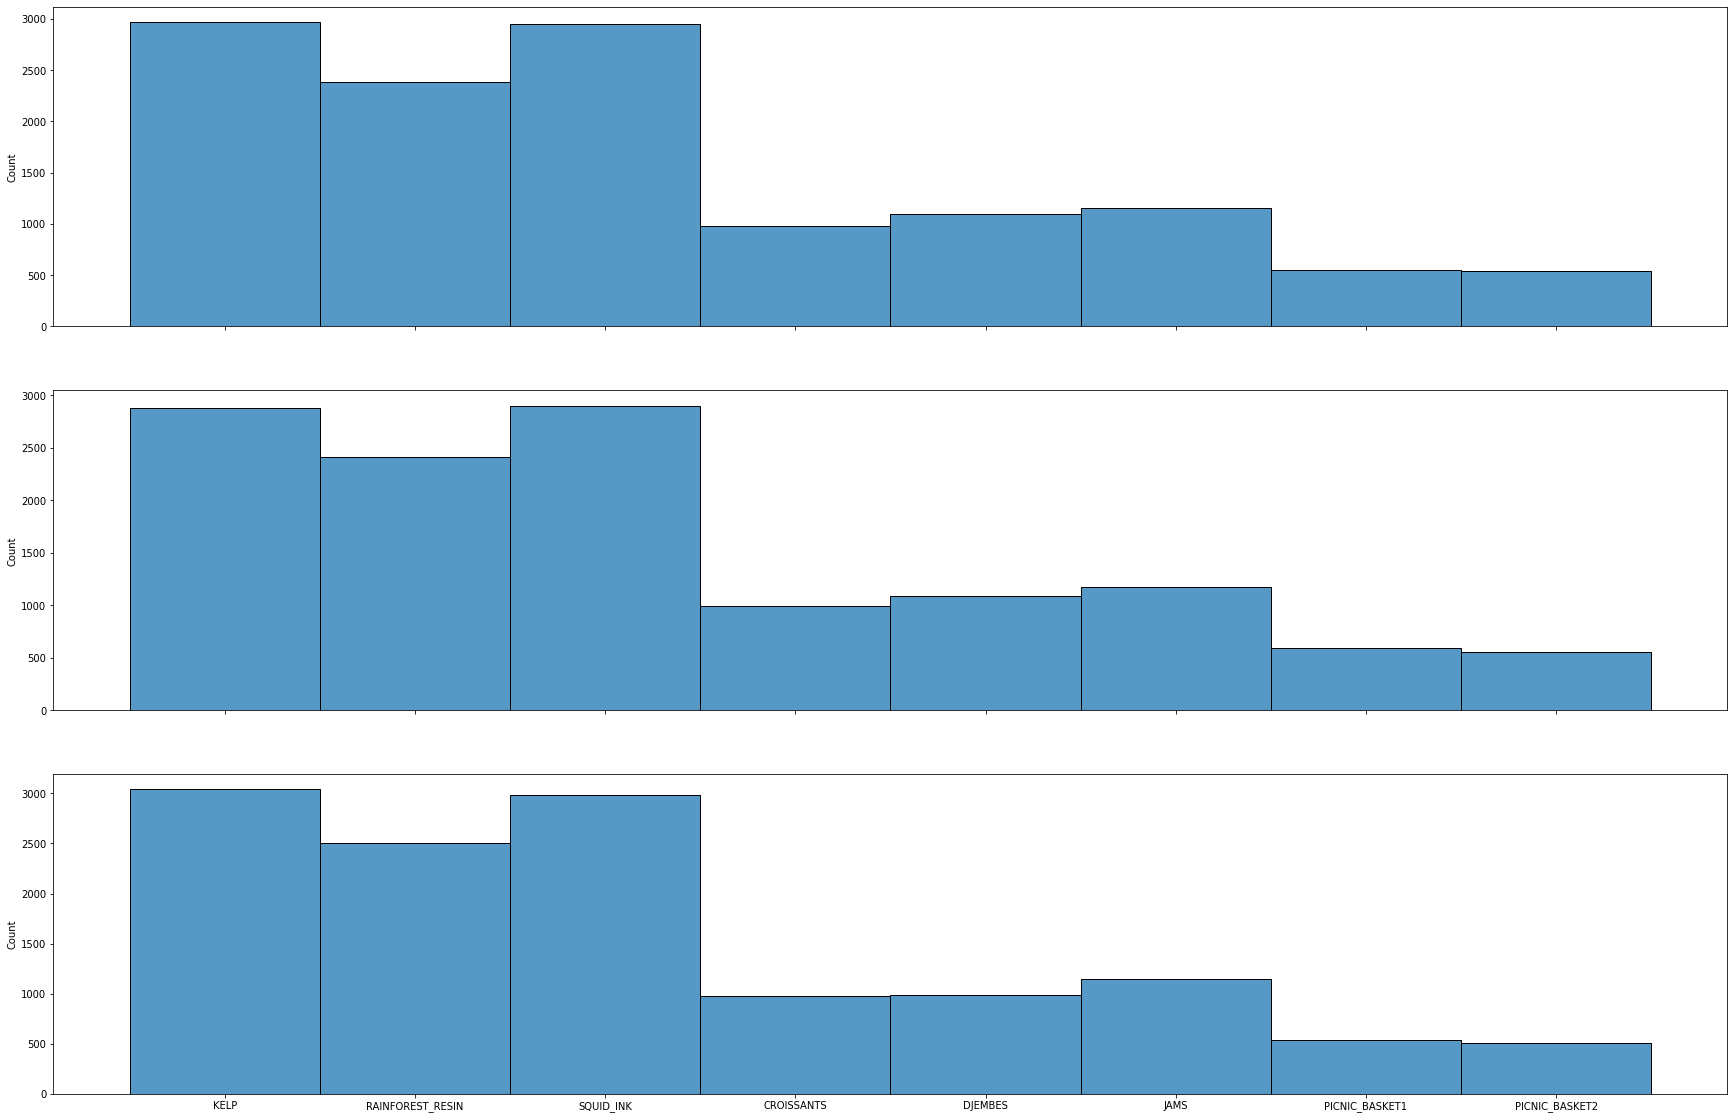

In [12]:
%matplotlib inline

plt.rcParams["figure.figsize"] = (20,8)
T_DATA_DAY_MINUS_1 = "../data/round-2-island-data-bottle/trades_round_2_day_-1.csv"
T_DATA_DAY_0 = "../data/round-2-island-data-bottle/trades_round_2_day_0.csv"
T_DATA_DAY_1 = "../data/round-2-island-data-bottle/trades_round_2_day_1.csv"

tdf0 = pd.read_csv(T_DATA_DAY_MINUS_1, sep=';')
tdf1 = pd.read_csv(T_DATA_DAY_0, sep=';')
tdf2 =  pd.read_csv(T_DATA_DAY_1, sep=';')

# tdf = pd.concat([tdf0, tdf1, tdf2])
tdf0.set_index(['timestamp'], inplace=True)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, 
                                gridspec_kw={'height_ratios': [1, 1, 1]}, 
                                sharex=True, 
                                figsize=(30,20))
sns.histplot(tdf0["symbol"].values, ax=ax1)
sns.histplot(tdf1["symbol"].values, ax=ax2)
sns.histplot(tdf2["symbol"].values, ax=ax3)

# Question answering
Max time arbitrage exists


In [13]:
PRODUCTS = {"PICNIC_BASKET1", "CROISSANTS", "JAMS", "DJEMBES"}
DAYS = {0}

baskets = df[df.index.isin(PRODUCTS, level=2)]
baskets = baskets[baskets.index.isin(DAYS, level=0)]

def check_arbitrage(x):
    picnic = x.loc[x.index.get_level_values(2) == "PICNIC_BASKET1"]
    croissants = x.loc[x.index.get_level_values(2) == "CROISSANTS"]
    jams = x.loc[x.index.get_level_values(2) == "JAMS"]
    djembes = x.loc[x.index.get_level_values(2) == "DJEMBES"]

    buy_spread = - picnic["bid_price_1"].iloc[0] + (
        6 * croissants["ask_price_1"].iloc[0] +
        3 * jams["ask_price_1"].iloc[0] +
        1 * djembes["ask_price_1"].iloc[0]
    )

    sell_spread = picnic["ask_price_1"].iloc[0] - (
        6 * croissants["bid_price_1"].iloc[0] +
        3 * jams["bid_price_1"].iloc[0] +
        1 * djembes["bid_price_1"].iloc[0]
    )
    
    if picnic["bid_volume_1"].iloc[0] <= 0 or picnic["ask_volume_1"].iloc[0] <= 0:
        return 0, buy_spread, sell_spread

    if buy_spread > 0 and sell_spread < 0:
        return 1, buy_spread, sell_spread # Buy basket, sell items separately
    elif sell_spread > 0 and buy_spread < 0:
        return -1, buy_spread, sell_spread  # Sell basket, buy items separately
    elif buy_spread > 0 and sell_spread > 0:
        if buy_spread > sell_spread:
            return 1, buy_spread, sell_spread
        return -1, buy_spread, sell_spread
    else:
        return 0, buy_spread, sell_spread # No arbitrage opportunity

# Identify arbitrage opportunities clearly by timestamp (level=1)
arbitrage_signals = baskets.groupby(level=1).apply(check_arbitrage)

# Filter timestamps where arbitrage opportunities exist
arbitrage_timestamps = arbitrage_signals[arbitrage_signals != 0].index

# Extract basket values at arbitrage timestamps
arbitrage_baskets = baskets[baskets.index.get_level_values(1).isin(arbitrage_timestamps)]

# Display clearly
arbitrage_signals = pd.DataFrame(map(list, arbitrage_signals.values), columns=["signal", "buy_spread", "sell_spread"], index=arbitrage_signals.index)
print("Arbitrage opportunities identified at timestamps:")
print(arbitrage_signals[arbitrage_signals != 0])

print("\nBasket values at arbitrage timestamps:")
print(arbitrage_baskets)

Arbitrage opportunities identified at timestamps:
           signal  buy_spread  sell_spread
timestamp                                 
0             1.0       102.0        -78.0
100           1.0        99.0        -78.0
200           1.0        93.0        -75.0
300           1.0       101.0        -79.0
400           1.0        99.0        -77.0
...           ...         ...          ...
999500       -1.0       -19.0         43.0
999600       -1.0       -25.0         42.0
999700       -1.0       -24.0         47.0
999800       -1.0       -18.0         40.0
999900       -1.0       -21.0         44.0

[10000 rows x 3 columns]

Basket values at arbitrage timestamps:
                              bid_price_1  bid_volume_1  bid_price_2  \
day timestamp product                                                  
0   0         DJEMBES               13493            72          NaN   
              CROISSANTS             4321           111          NaN   
              JAMS                   

In [14]:
baskets.index.get_level_values(2).size/4, arbitrage_baskets.index.get_level_values(2).size/4

(10000.0, 10000.0)

In [15]:
random_index = np.random.choice(arbitrage_baskets.index.get_level_values(1).values)
print(arbitrage_signals.loc[random_index])
a = arbitrage_baskets[arbitrage_baskets.index.isin([random_index], level=1)]
print("Buy basket, sell underlying: ", - a[a.index.get_level_values(2) == "PICNIC_BASKET1"]["bid_price_1"].iloc[0] + (
    6 * a[a.index.get_level_values(2) == "CROISSANTS"]["ask_price_1"].iloc[0] +
    3 * a[a.index.get_level_values(2) == "JAMS"]["ask_price_1"].iloc[0] + 
    1 * a[a.index.get_level_values(2) == "DJEMBES"]["ask_price_1"].iloc[0]  
))
print("Sell basket, buy underlying: ",  a[a.index.get_level_values(2) == "PICNIC_BASKET1"]["ask_price_1"].iloc[0] - (
    6 * a[a.index.get_level_values(2) == "CROISSANTS"]["bid_price_1"].iloc[0] +
    3 * a[a.index.get_level_values(2) == "JAMS"]["bid_price_1"].iloc[0] + 
    1 * a[a.index.get_level_values(2) == "DJEMBES"]["bid_price_1"].iloc[0]  
))
a

signal         -1
buy_spread    -76
sell_spread    97
Name: 655400, dtype: int64
Buy basket, sell underlying:  -76
Sell basket, buy underlying:  97


bid_price_1  bid_volume_1  bid_price_2  \
day timestamp product                                                  
0   655400    DJEMBES               13424            28      13423.0   
              PICNIC_BASKET1        59068            10      59067.0   
              CROISSANTS             4294            57       4293.0   
              JAMS                   6598           222          NaN   

                              bid_volume_2  bid_price_3  bid_volume_3  \
day timestamp product                                                   
0   655400    DJEMBES                 34.0          NaN           NaN   
              PICNIC_BASKET1          28.0          NaN           NaN   
              CROISSANTS              67.0          NaN           NaN   
              JAMS                     NaN          NaN           NaN   

                              ask_price_1  ask_volume_1  ask_price_2  \
day timestamp product                                                  
0   655400    DJEMBES               13425            62          NaN   
              PICNIC_BASKET1        59079            10      59080.0   
              CROISSANTS             4295           115          NaN   
              JAMS                   6599             6       6600.0   

                              ask_volume_2  ask_price_3  ask_volume_3  \
day timestamp product                                                   
0   655400    DJEMBES                  NaN          NaN           NaN   
              PICNIC_BASKET1          28.0          NaN           NaN   
              CROISSANTS               NaN          NaN           NaN   
              JAMS                   222.0          NaN           NaN   

                              mid_price  profit_and_loss  
day timestamp product                                     
0   655400    DJEMBES           13424.5              0.0  
              PICNIC_BASKET1    59073.5              0.0  
              CROISSANTS         4294.5              0.0  
              JAMS               6598.5              0.0

<AxesSubplot:xlabel='timestamp'>

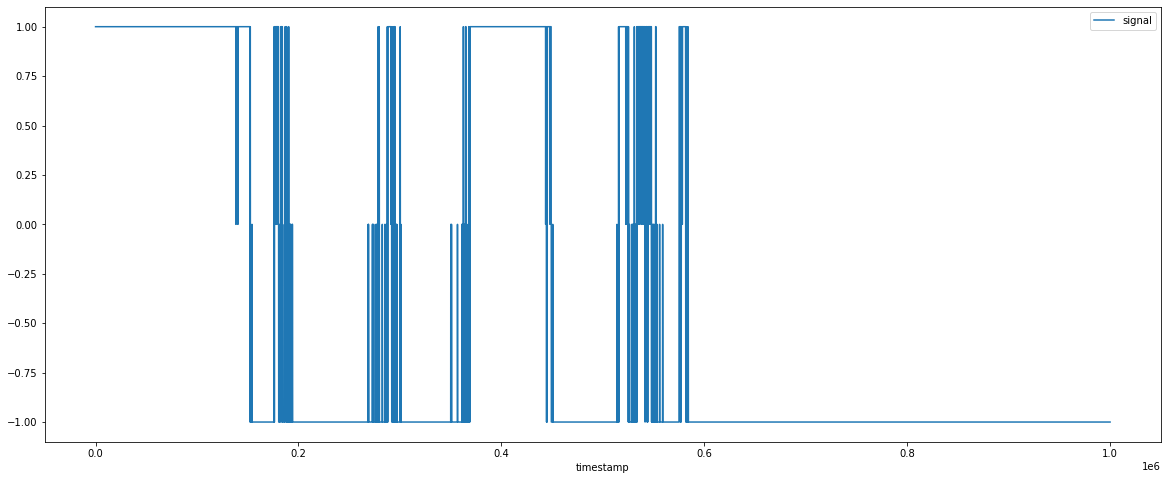

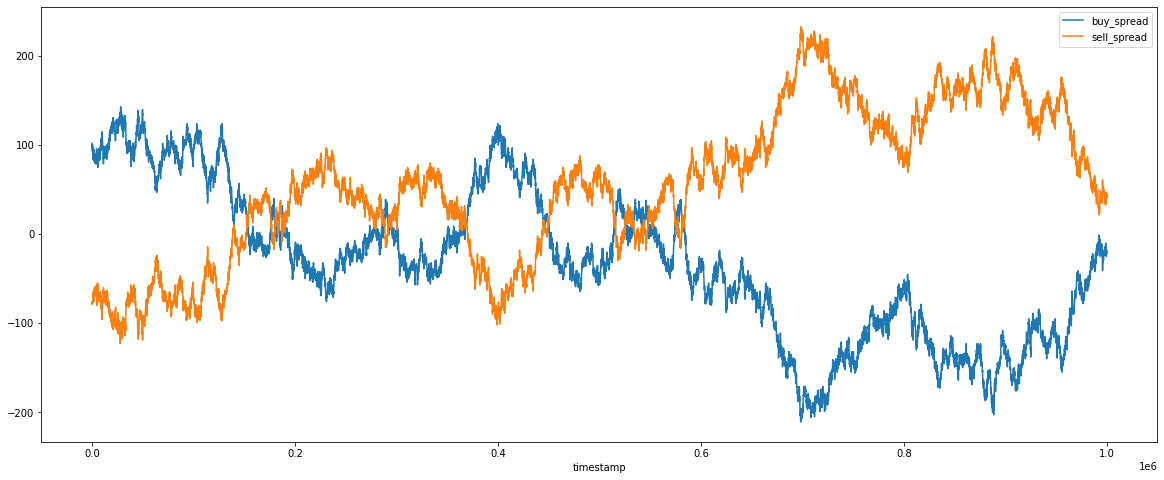

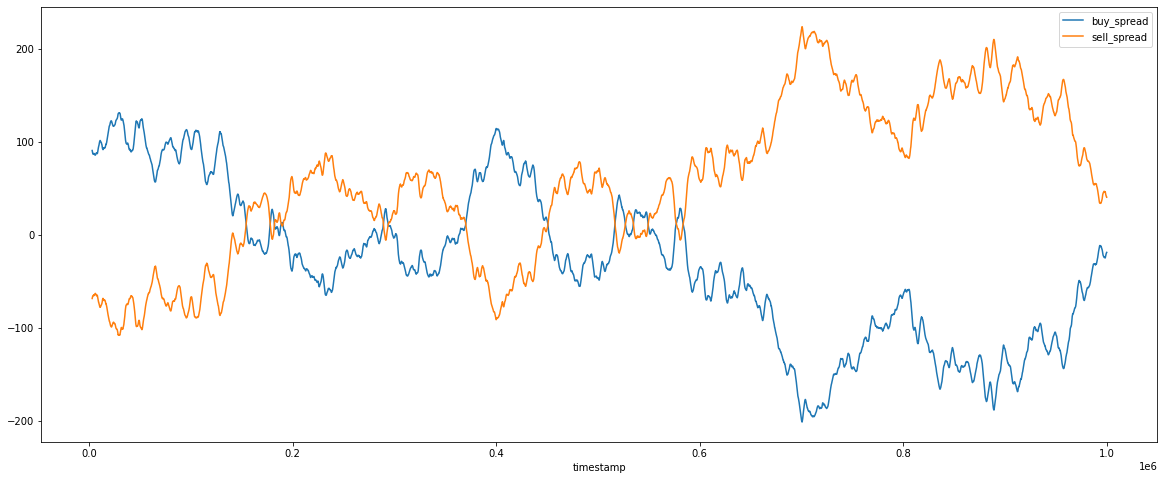

In [16]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,8)
arbitrage_signals.plot(y="signal")
arbitrage_signals.plot(y=["buy_spread", "sell_spread"])
arbitrage_signals.rolling(30).mean().plot(y=["buy_spread", "sell_spread"])

In [17]:
import numpy as np
%matplotlib qt

# Define your adjustable epsilon threshold
EPSILON = 0.01  # Adjust as needed
plt.rcParams["figure.figsize"] = (20,8)

# Calculate 30-day moving averages
arbitrage_signals["buy_spread_MA30"] = arbitrage_signals["buy_spread"].rolling(30).mean()
arbitrage_signals["sell_spread_MA30"] = arbitrage_signals["sell_spread"].rolling(30).mean()

# Calculate gradients of the moving averages
arbitrage_signals["buy_gradient"] = np.gradient(arbitrage_signals["buy_spread_MA30"].values)
arbitrage_signals["sell_gradient"] = np.gradient(arbitrage_signals["sell_spread_MA30"].values)

# Function to classify gradient behavior clearly
def classify_gradient(row, epsilon=EPSILON):
    buy_grad, sell_grad = row["buy_gradient"], row["sell_gradient"]
    
    # Check for flatness first
    if abs(buy_grad) <= epsilon and abs(sell_grad) <= epsilon:
        return "flat"
    # Converging: Buy spread gradient negative, Sell spread gradient positive
    elif buy_grad < -epsilon and sell_grad > epsilon:
        return "converging"
    # Diverging: Buy spread gradient positive, Sell spread gradient negative
    elif buy_grad > epsilon and sell_grad < -epsilon:
        return "diverging"
    # Otherwise unclear direction
    else:
        return "undetermined"

# Apply the classification
arbitrage_signals["gradient_behavior"] = arbitrage_signals.apply(classify_gradient, axis=1)

# View resulting dataframe clearly
# arbitrage_signals.plot(y=["buy_spread", "sell_spread"])
# arbitrage_signals.plot(y=["buy_gradient", "sell_gradient"])

# Visualization clearly showing behaviors
# plt.figure(figsize=(20, 8))
# arbitrage_signals["buy_spread_MA30"].plot(label="Buy Spread MA30", color='blue')
# arbitrage_signals["sell_spread_MA30"].plot(label="Sell Spread MA30", color='orange')
#
# # Highlight converging, diverging, and flat behaviors clearly
# for idx, row in arbitrage_signals.iterrows():
#     if row["gradient_behavior"] == "converging":
#         plt.axvline(idx, color='green', alpha=0.2)
#     elif row["gradient_behavior"] == "diverging":
#         plt.axvline(idx, color='red', alpha=0.2)
#     elif row["gradient_behavior"] == "flat":
#         plt.axvline(idx, color='grey', alpha=0.1)
#
# plt.legend()
# plt.title("Spread Gradients and Behavior Classification")
# plt.xlabel("Timestamp")
# plt.ylabel("Spread Moving Average")
# plt.show()

In [18]:
sequence_lengths

NameError: name 'sequence_lengths' is not defined

<AxesSubplot:xlabel='length', ylabel='Count'>

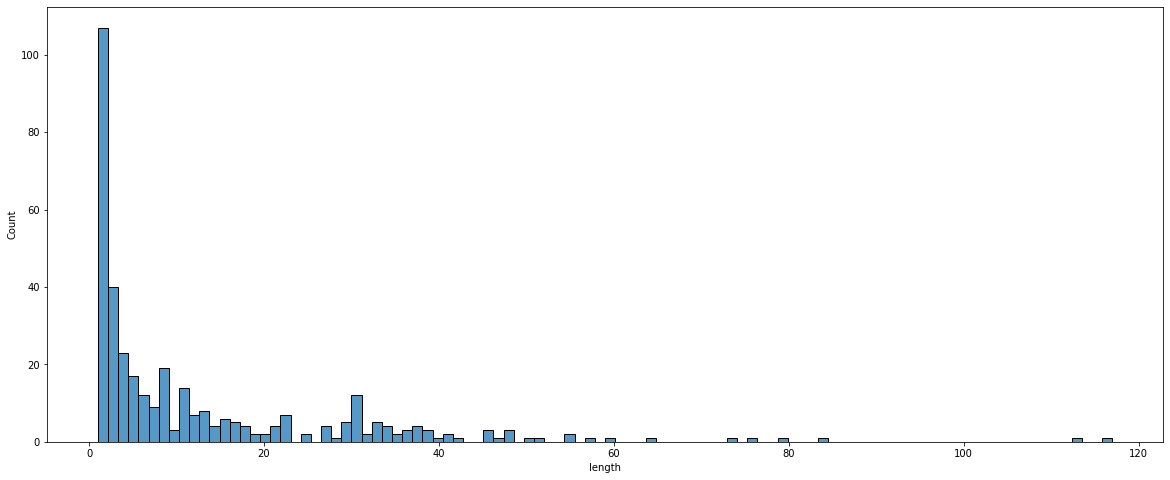

In [ ]:
# Ensure pandas is imported
import pandas as pd
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,8)

# Clearly identify changes in gradient_behavior states
arbitrage_signals["behavior_change"] = arbitrage_signals["gradient_behavior"] != arbitrage_signals["gradient_behavior"].shift()

# Assign a unique ID to each continuous sequence
arbitrage_signals["sequence_id"] = arbitrage_signals["behavior_change"].cumsum()

# Calculate the length of each continuous sequence
sequence_lengths = arbitrage_signals.groupby(["sequence_id", "gradient_behavior"]).size().reset_index(name="length")

# Display clearly
sns.histplot(sequence_lengths[sequence_lengths.gradient_behavior == "converging"], x="length", bins=100)